In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('dark_background')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_cleaned_labeled_final=pd.read_csv('C:/Users/adham.hany/Desktop/OBD/Cluster_DATA.csv')


Model: Random Forest
Confusion Matrix:
[[4623    0    1]
 [   0 4602    3]
 [   0    1 4570]]
Accuracy: 0.9996

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4624
           1       1.00      1.00      1.00      4605
           2       1.00      1.00      1.00      4571

    accuracy                           1.00     13800
   macro avg       1.00      1.00      1.00     13800
weighted avg       1.00      1.00      1.00     13800



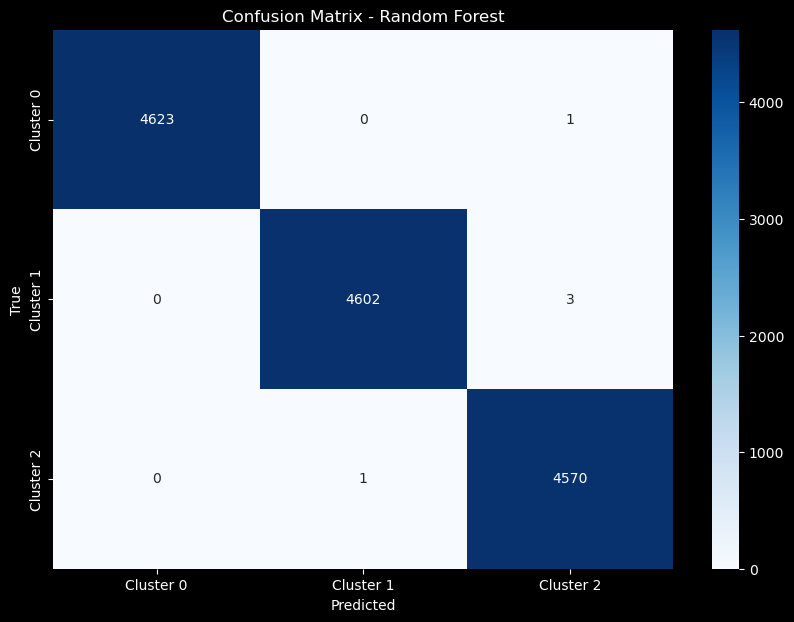


Model: Naive Bayes
Confusion Matrix:
[[4568    0   56]
 [   0 4558   47]
 [   6   50 4515]]
Accuracy: 0.9885

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4624
           1       0.99      0.99      0.99      4605
           2       0.98      0.99      0.98      4571

    accuracy                           0.99     13800
   macro avg       0.99      0.99      0.99     13800
weighted avg       0.99      0.99      0.99     13800



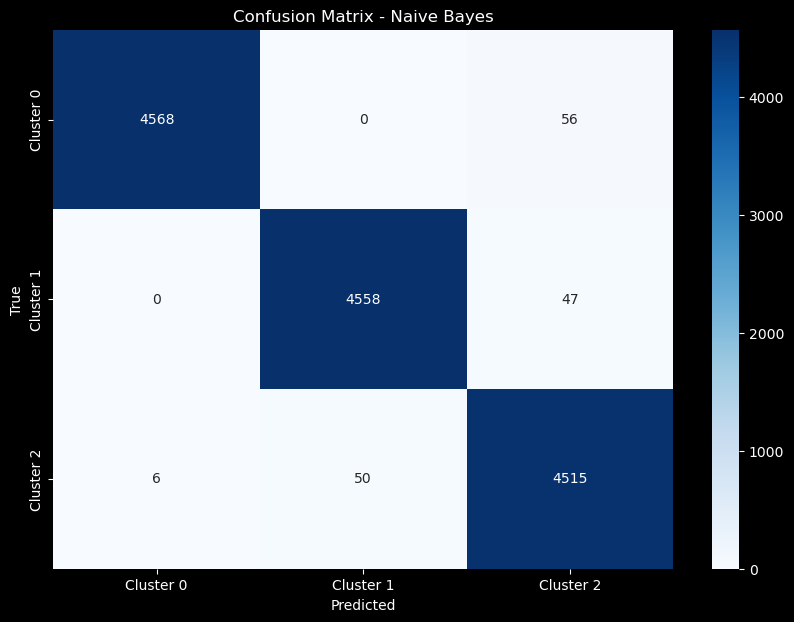


Model: Decision Tree
Confusion Matrix:
[[4623    0    1]
 [   0 4602    3]
 [   0    0 4571]]
Accuracy: 0.9997

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4624
           1       1.00      1.00      1.00      4605
           2       1.00      1.00      1.00      4571

    accuracy                           1.00     13800
   macro avg       1.00      1.00      1.00     13800
weighted avg       1.00      1.00      1.00     13800



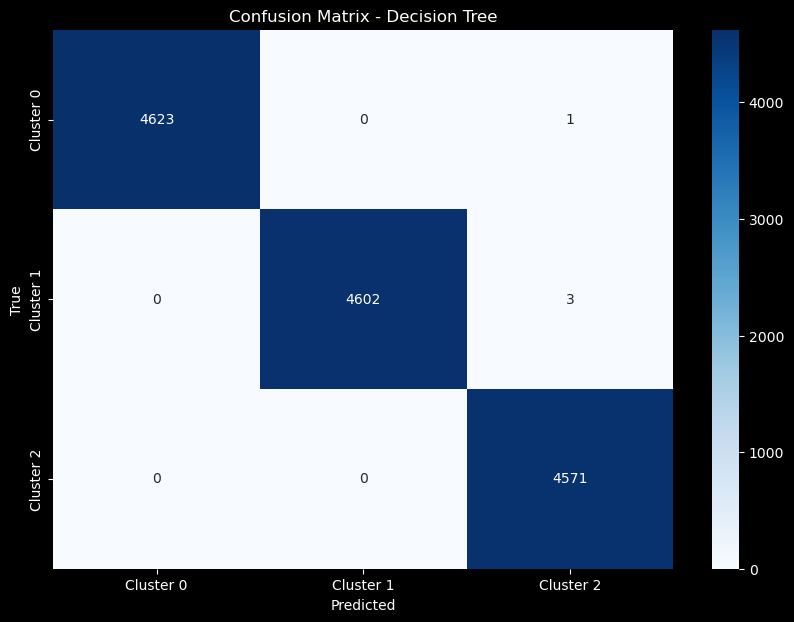


Model: Gradient Boosting
Confusion Matrix:
[[4623    0    1]
 [   0 4602    3]
 [   0    1 4570]]
Accuracy: 0.9996

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4624
           1       1.00      1.00      1.00      4605
           2       1.00      1.00      1.00      4571

    accuracy                           1.00     13800
   macro avg       1.00      1.00      1.00     13800
weighted avg       1.00      1.00      1.00     13800



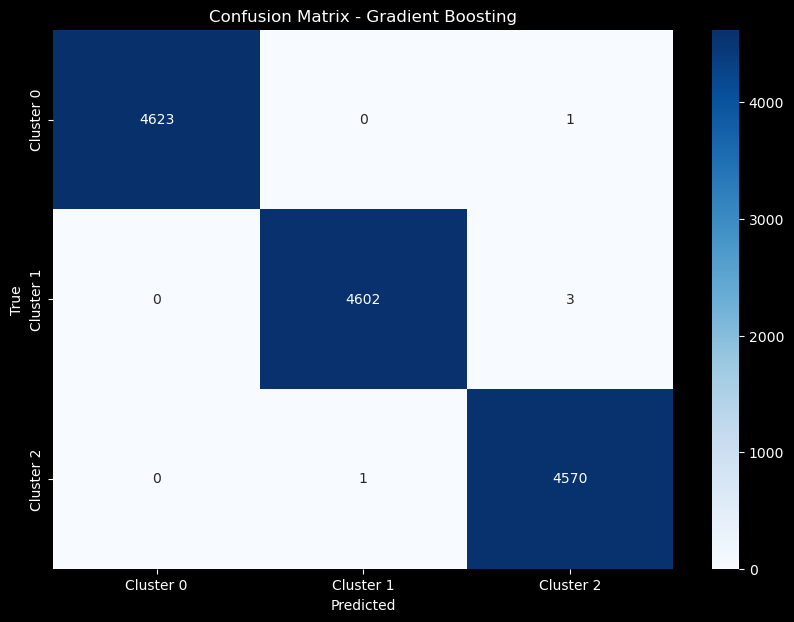


Model: Neural Network
Confusion Matrix:
[[4602    0   22]
 [   0 4574   31]
 [  17   40 4514]]
Accuracy: 0.9920

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4624
           1       0.99      0.99      0.99      4605
           2       0.99      0.99      0.99      4571

    accuracy                           0.99     13800
   macro avg       0.99      0.99      0.99     13800
weighted avg       0.99      0.99      0.99     13800



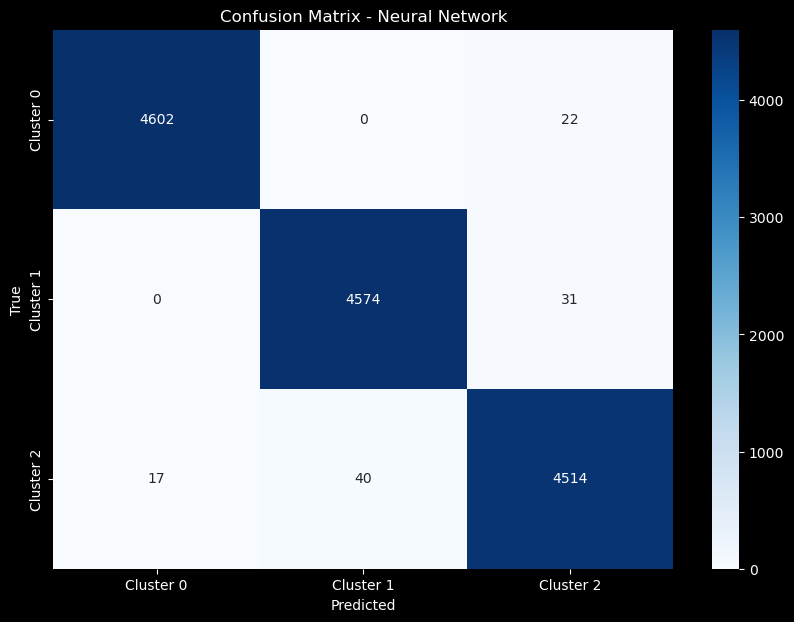


Model: K-Nearest Neighbors
Confusion Matrix:
[[4577    0   47]
 [   0 4554   51]
 [  44   43 4484]]
Accuracy: 0.9866

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4624
           1       0.99      0.99      0.99      4605
           2       0.98      0.98      0.98      4571

    accuracy                           0.99     13800
   macro avg       0.99      0.99      0.99     13800
weighted avg       0.99      0.99      0.99     13800



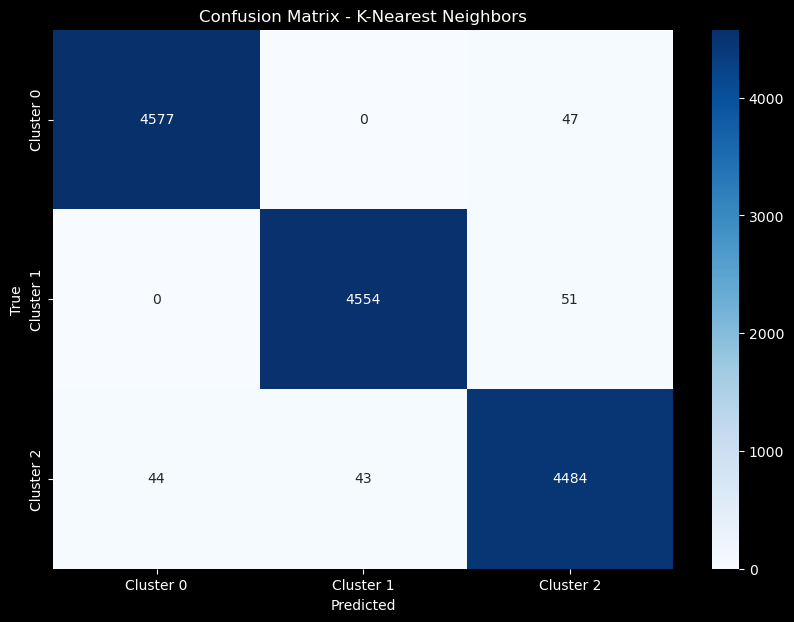

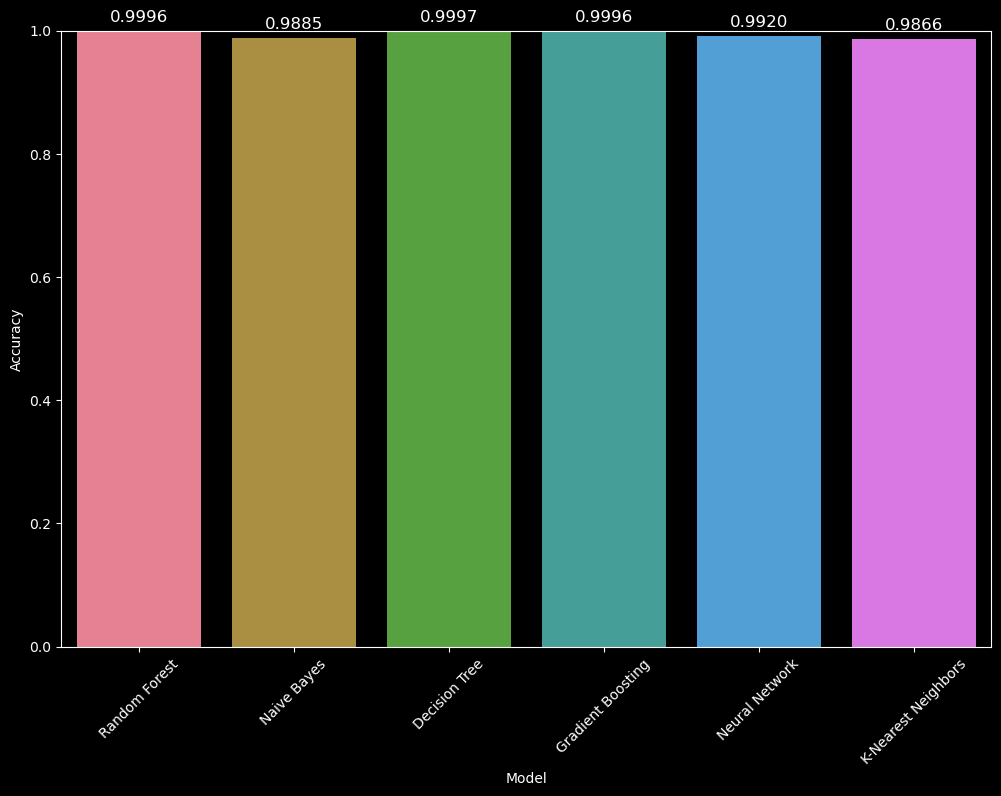

In [3]:
# Models dictionary
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Neural Network': MLPClassifier(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
}

# Define target column
target_column = 'labels'

# Features and target
features = df_cleaned_labeled_final.drop(columns=[target_column])
target = df_cleaned_labeled_final[target_column]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Dictionary to store the accuracies of each model
accuracies = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print classification report and confusion matrix
    print(f"\nModel: {name}")

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f"Accuracy: {accuracy:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'],
                yticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Plot the accuracies using a bar chart
plt.figure(figsize=(12, 8))
colors = sns.color_palette('husl', len(models))  # Generate a list of colors
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

plt.ylim(0, 1)  # Assuming accuracies are between 0 and 1

# Add annotations on top of the bars
for i, (name, accuracy) in enumerate(accuracies.items()):
    plt.text(i, accuracy + 0.01, f'{accuracy:.4f}', ha='center', va='bottom', fontsize=12)

plt.show()


# Naive Bayes


Model: Naive Bayes
Confusion Matrix:
[[4568    0   56]
 [   0 4558   47]
 [   6   50 4515]]
Accuracy: 0.9885

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4624
           1       0.99      0.99      0.99      4605
           2       0.98      0.99      0.98      4571

    accuracy                           0.99     13800
   macro avg       0.99      0.99      0.99     13800
weighted avg       0.99      0.99      0.99     13800



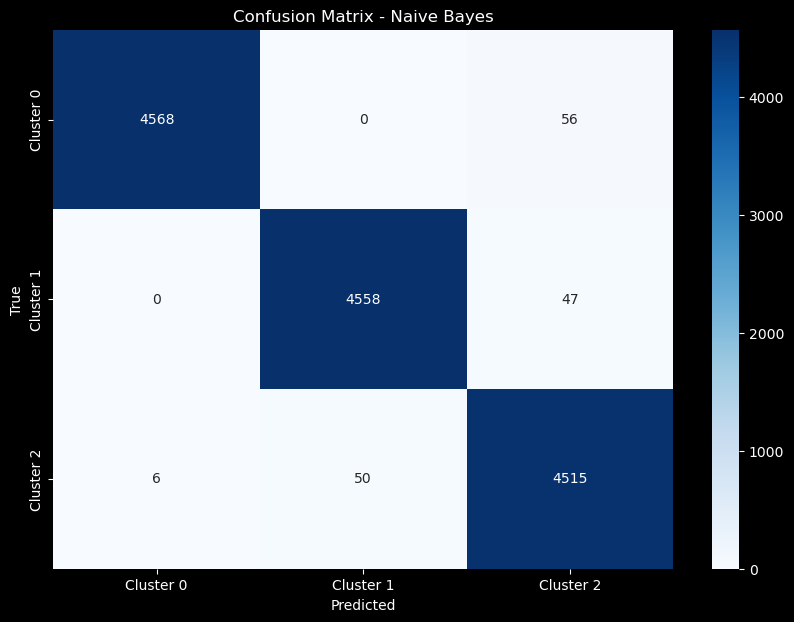

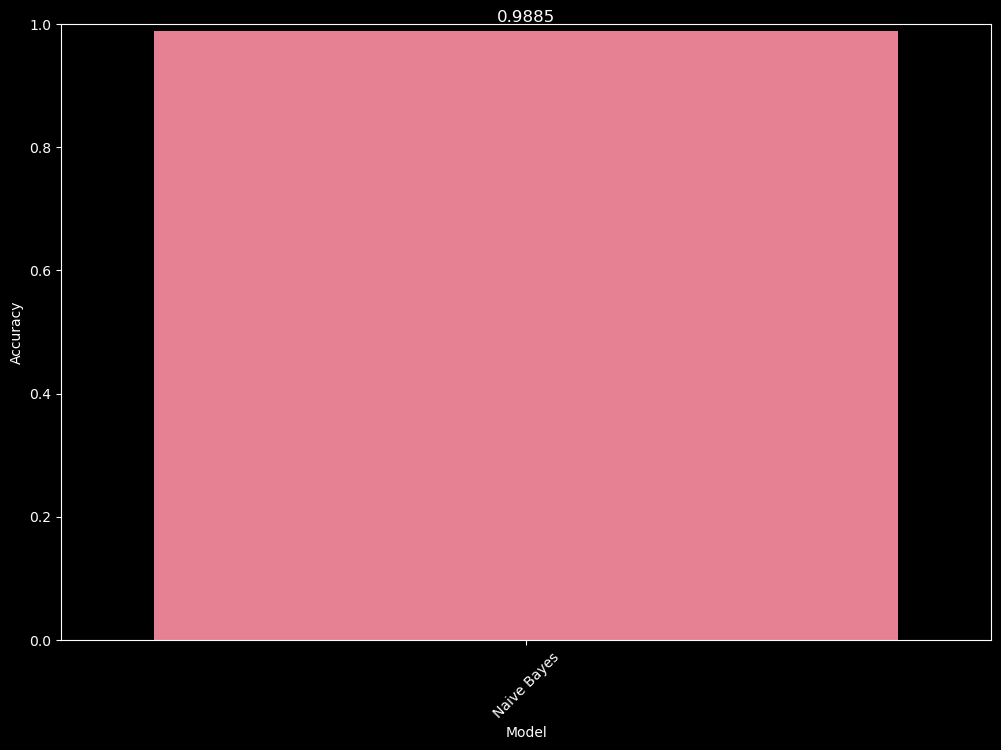

In [4]:
models2 = {
    'Naive Bayes': GaussianNB(),
}

# Define target column
target_column = 'labels'

# Features and target
features = df_cleaned_labeled_final.drop(columns=[target_column])
target = df_cleaned_labeled_final[target_column]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Dictionary to store the accuracies of each model
accuracies = {}

# Train and evaluate each model
for name, model in models2.items():
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print classification report and confusion matrix
    print(f"\nModel: {name}")

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f"Accuracy: {accuracy:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'],
                yticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Plot the accuracies using a bar chart
plt.figure(figsize=(12, 8))
colors = sns.color_palette('husl', len(models))  # Generate a list of colors
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

plt.ylim(0, 1)  # Assuming accuracies are between 0 and 1

# Add annotations on top of the bars
for i, (name, accuracy) in enumerate(accuracies.items()):
    plt.text(i, accuracy + 0.01, f'{accuracy:.4f}', ha='center', va='bottom', fontsize=12)

plt.show()

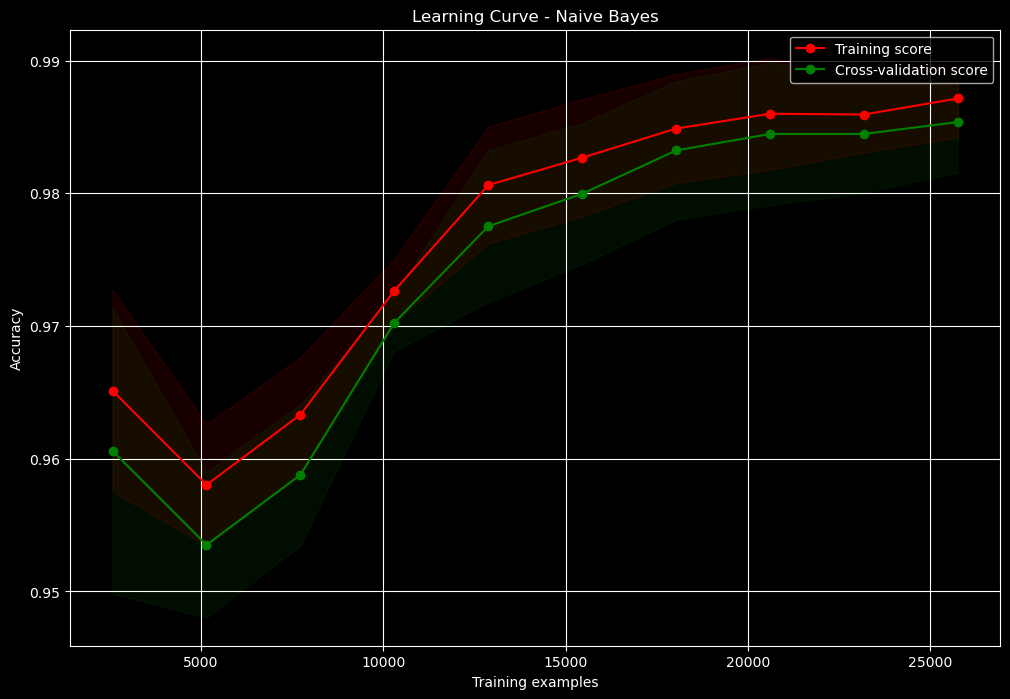

In [5]:
from sklearn.model_selection import learning_curve

# Function to plot the learning curve
def plot_learning_curve(model, X_train, y_train, title):
    plt.figure(figsize=(12, 8))

    # Generate learning curves
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy',
                                                            train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)
    # Calculate mean and standard deviation for training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curves
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plot learning curves for Naive Bayes and K-Nearest Neighbors
for name, model in models2.items():
    plot_learning_curve(model, X_train, y_train, f"Learning Curve - {name}")


# StreamLit Deployment

In [6]:
!pip install streamlit 

In [7]:
!pip install joblib

In [8]:
from joblib import dump

# Assuming you have a model named `model`
dump(model, 'model.joblib')

['model.joblib']

In [10]:
df_cleaned_labeled_final.columns

Index(['TIMESTAMP', 'ENGINE_POWER', 'AUTOMATIC', 'VEHICLE_ID',
       'BAROMETRIC_PRESSURE(KPA)', 'FUEL_LEVEL', 'ENGINE_LOAD', 'ENGINE_RPM',
       'INTAKE_MANIFOLD_PRESSURE', 'MAF', 'LONG TERM FUEL TRIM BANK 2',
       'FUEL_TYPE', 'AIR_INTAKE_TEMP', 'SPEED', 'THROTTLE_POS', 'DTC_NUMBER',
       'TROUBLE_CODES', 'TIMING_ADVANCE', 'MIN', 'HOURS', 'DAYS_OF_WEEK',
       'MONTHS', 'Total_Engine_Seconds', 'Acceleration', 'Braking',
       'Engine_Load_Percentage', 'Wheels_Tuning_Index', 'VEHICLE_AGE',
       'TEMP_DIFFERENCE', 'AVG_Short_term_fuel_trim', 'labels'],
      dtype='object')

In [13]:
df_cleaned_labeled_final.head(1)

TIMESTAMP  ENGINE_POWER  AUTOMATIC  VEHICLE_ID  BAROMETRIC_PRESSURE(KPA)  \
0      0.004     -0.408392  -0.633736           1                   0.39486   

   FUEL_LEVEL  ENGINE_LOAD  ENGINE_RPM  INTAKE_MANIFOLD_PRESSURE       MAF  \
0    0.934328    -0.065899   -0.897199                 -0.546338 -0.061214   

   ...    MONTHS  Total_Engine_Seconds  Acceleration   Braking  \
0  ... -0.007532             -0.325821      0.004342 -0.784513   

   Engine_Load_Percentage  Wheels_Tuning_Index  VEHICLE_AGE  TEMP_DIFFERENCE  \
0               -0.991999            -0.991658    -0.075541         0.180658   

   AVG_Short_term_fuel_trim  labels  
0                 -0.965672       0  

[1 rows x 31 columns]

In [17]:
df_cleaned_labeled_final.to_csv("EDA_DATA2.csv")